# Monetary Economics: Chapter 6

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt

### Model OPENG

In [2]:
def create_openg_model():
    model = Model()

    model.set_var_default(0)
    model.var('BcbN', desc='Bills held by the Central Bank in Country N')
    model.var('BcbS', desc='Bills held by the Central Bank in Country S')
    model.var('BhN', desc='Bills held by households, Country N')
    model.var('BhS', desc='Bills held by households, Country S')
    model.var('BsN', desc='Supply of government bills in Country N')
    model.var('BsS', desc='Supply of government bills in Country S')
    model.var('CN', desc='Consumption, Country N')
    model.var('CS', desc='Consumption, Country S')
    model.var('GN', desc='Government expenditure, Region N')
    model.var('GS', desc='Government expenditure, Region S')
    model.var('HhN', desc='Cash held by households, Country N')
    model.var('HhS', desc='Cash held by households, Country S')
    model.var('HsN', desc='Supply of cash in Country N')
    model.var('HsS', desc='Supply of cash in Country S')
    model.var('IMN', desc='Imports, Region N')
    model.var('IMS', desc='Imports, Region S')
    model.var('ORN', desc='Gold holding by Central bank in Country N')
    model.var('ORS', desc='Gold holding by Central bank in Country S')
    model.var('PgN', desc='Price of gold in Country N')
    model.var('PgS', desc='Price of gold in Country S')
    model.var('RN', desc='Interest rate on bills in Country N')
    model.var('RS', desc='Interest rate on bills in Country S')
    model.var('TN', desc='Tax payments, Country N')
    model.var('TS', desc='Tax payments, Country S')
    model.var('VN', desc='Household wealth, Country N')
    model.var('VS', desc='Household wealth, Country S')
    model.var('XN', desc='Exports, Country N')
    model.var('XS', desc='Exports, Country S')
    model.var('XR', desc='Exchange rate (units of currency S for one unit of currency N)')
    model.var('YN', desc='National income, Country N')
    model.var('YS', desc='National income, Country S')
    model.var('YDN', desc='National disposable income, Country N')
    model.var('YDS', desc='National disposable income, Country S')

    model.set_param_default(0)
    model.param('alpha1N', desc='Propensity to consume out of income, Country N')
    model.param('alpha1S', desc='Propensity to consume out of income, Country S')
    model.param('alpha2N', desc='Propensity to consume out of wealth, Country N')
    model.param('alpha2S', desc='Propensity to consume out of wealth, Country S')
    model.param('lambda0N', desc='Parameter in asset demand function, Country N')
    model.param('lambda0S', desc='Parameter in asset demand function, Country S')
    model.param('lambda1N', desc='Parameter in asset demand function, Country N')
    model.param('lambda1S', desc='Parameter in asset demand function, Country S')
    model.param('lambda2N', desc='Parameter in asset demand function, Country N')
    model.param('lambda2S', desc='Parameter in asset demand function, Country S')
    model.param('muN', desc='Import propensity, Country N')
    model.param('muS', desc='Import propensity, Country S')
    model.param('phiN', desc='Parameter in fiscal policy reaction function, Country N')
    model.param('phiS', desc='Parameter in fiscal policy reaction function, Country S')
    model.param('thetaN', desc='Tax rate in Country N')
    model.param('thetaS', desc='Tax rate in Country S')

    model.param('Pgbar', desc='Price of gold, set exogenously')
    model.param('RbarN', desc='Interest rate on bills set exogenously in Country N')
    model.param('RbarS', desc='Interest rate on bills set exogenously in Country S')
    model.param('XRbar', desc='Exchange rate, set exogenously')

    model.add('YN = CN + GN + XN - IMN')
    model.add('YS = CS + GS + XS - IMS')
    model.add('IMN = muN * YN')
    model.add('IMS = muS * YS')
    model.add('XN = IMS/XR')
    model.add('XS = IMN*XR')
    model.add('YDN = YN - TN + RN(-1)*BhN(-1)')
    model.add('YDS = YS - TS + RS(-1)*BhS(-1)')
    model.add('TN = thetaN * (YN + RN(-1)*BhN(-1))')
    model.add('TS = thetaS * (YS + RS(-1)*BhS(-1))')
    model.add('VN - VN(-1) = YDN - CN')
    model.add('VS - VS(-1) = YDS - CS')
    model.add('CN = alpha1N*YDN + alpha2N*VN(-1)')
    model.add('CS = alpha1S*YDS + alpha2S*VS(-1)')
    model.add('HhN = VN - BhN')
    model.add('HhS = VS - BhS')
    model.add('BhN = VN*(lambda0N + lambda1N*RN - lambda2N*(YDN/VN))')
    model.add('BhS = VS*(lambda0S + lambda1S*RS - lambda2S*(YDS/VS))')
    model.add('BsN - BsN(-1) = (GN + RN(-1)*BsN(-1)) - (TN + RN(-1)*BcbN(-1))')
    model.add('BsS - BsS(-1) = (GS + RS(-1)*BsS(-1)) - (TS + RS(-1)*BcbS(-1))')
    model.add('BcbN = BsN - BhN')
    model.add('BcbS = BsS - BhS')
    model.add('ORN - ORN(-1)= (HsN - HsN(-1) - (BcbN - BcbN(-1)))/PgN')
    model.add('ORS - ORS(-1)= (HsS - HsS(-1) - (BcbS - BcbS(-1)))/PgS')
    model.add('HsN = HhN')
    model.add('HsS = HhS')
    model.add('PgN = Pgbar')
    model.add('PgS = PgN*XR')
    model.add('XR = XRbar')
    model.add('RN = RbarN')
    model.add('RS = RbarS')
    model.add('GN = GN(-1) + phiN*(ORN(-1) - ORN(-2))*PgN(-1)')
    model.add('GS = GS(-1) + phiS*(ORS(-1) - ORS(-2))*PgS(-1)')
    
    return model

openg_parameters = {'alpha1N': 0.6,
                    'alpha1S': 0.7,
                    'alpha2N': 0.4,
                    'alpha2S': 0.3,
                    'lambda0N': 0.635,
                    'lambda0S': 0.67,
                    'lambda1N': 5,
                    'lambda1S': 6,
                    'lambda2N': 0.01,
                    'lambda2S': 0.07,
                    'muN': 0.18781,
                    'muS': 0.18781,
                    'phiN': 0.25,
                    'phiS': 0.25,
                    'thetaN': 0.2,
                    'thetaS': 0.2}
openg_exogenous = {'Pgbar': 1,
                   'RbarN': 0.025,
                   'RbarS': 0.025,
                   'XRbar': 1}
openg_variables = {'BcbN': 11.622,
                   'BcbS': 11.622,
                   'BhN': 64.865,
                   'BhS': 64.865,
                   'BsN': 76.486,
                   'BsS': 76.486,
                   'GN': 20,
                   'GS': 20,
                   'ORN': 10,
                   'ORS': 10,
                   'PgN': 1,
                   'PgS': 1,
                   'RN': 0.025,
                   'RS': 0.025,
                   'VN': 86.487,
                   'VS': 86.487,
                   'HhN': 86.487 - 64.865,
                   'HhS': 86.487 - 64.865,
                   'HsN': 86.487 - 64.865,
                   'HsS': 86.487 - 64.865,
                   'XR': 1}

### Scenario: Model OPENG, increase in propensity to import of country S

In [3]:
muS = create_openg_model()
muS.set_values(openg_parameters)
muS.set_values(openg_exogenous)
muS.set_values(openg_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(40):
    muS.solve(iterations=100, threshold=1e-6)

muS.solutions = muS.solutions[25:]

# shock the system
muS.set_values({'muS': 0.20781})

for _ in range(40):
    muS.solve(iterations=100, threshold=1e-6)

###### Figure 6.12

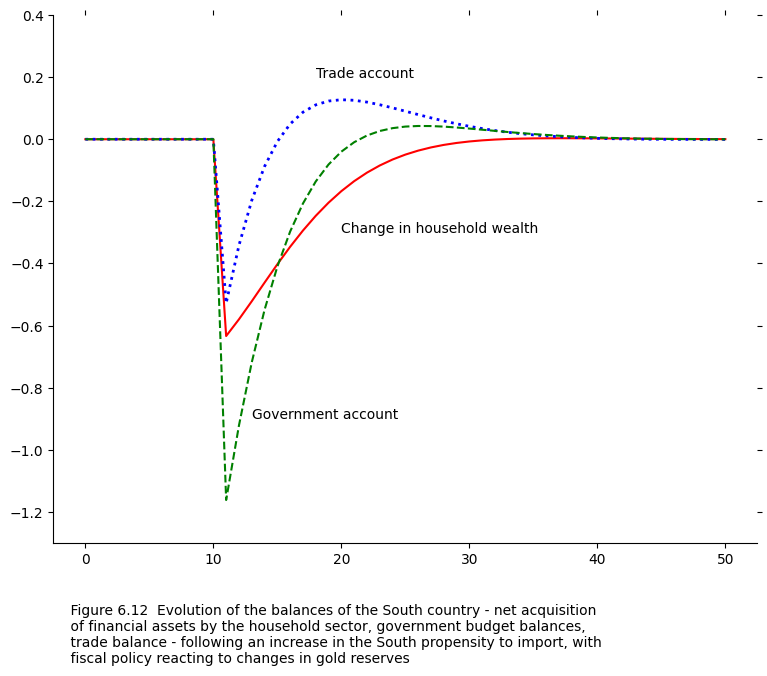

In [4]:
caption = '''
    Figure 6.12  Evolution of the balances of the South country - net acquisition
    of financial assets by the household sector, government budget balances,
    trade balance - following an increase in the South propensity to import, with
    fiscal policy reacting to changes in gold reserves'''
vsdata = list()
govdata = list()
tradedata = list()

for i in range(5, len(muS.solutions)):
    s = muS.solutions[i]
    s_1 = muS.solutions[i-1]
    vsdata.append(s['VS'] - s_1['VS'])
    govdata.append(s['TS'] -(s['GS'] + s['RS']*s_1['BhS']))
    tradedata.append(s['XS'] - s['IMS'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-1.3, 0.4)

axes.plot(vsdata, linestyle='-', color='r')
axes.plot(govdata, linestyle=':', color='b', linewidth=2)
axes.plot(tradedata, linestyle='--', color='g')

# add labels
plt.text(20, -0.3, 'Change in household wealth')
plt.text(18, 0.2, 'Trade account')
plt.text(13, -.9, 'Government account')
fig.text(0.1, -.15, caption);

###### Figure 6.13

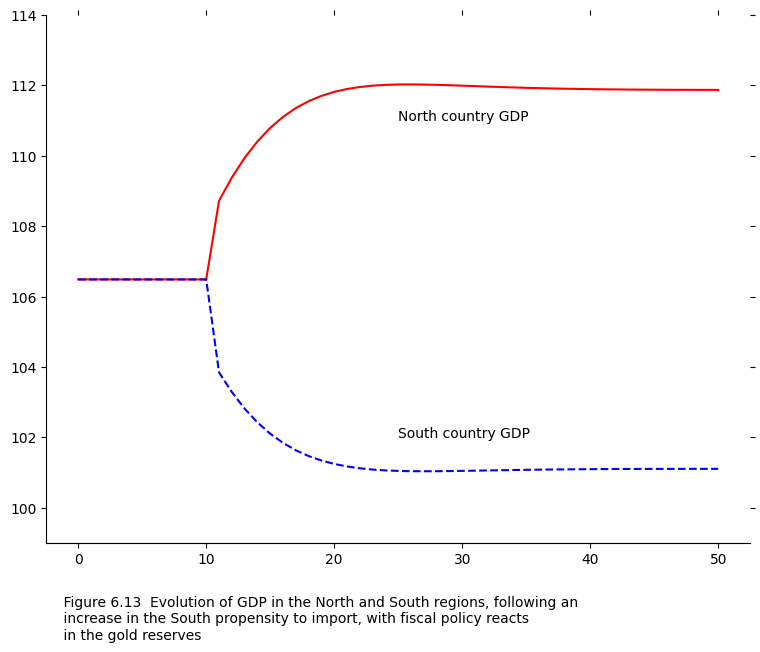

In [5]:
caption = '''
    Figure 6.13  Evolution of GDP in the North and South regions, following an
    increase in the South propensity to import, with fiscal policy reacts
    in the gold reserves'''
yndata = [s['YN'] for s in muS.solutions[5:]]
ysdata = [s['YS'] for s in muS.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(99, 114)

axes.plot(yndata, linestyle='-', color='r')
axes.plot(ysdata, linestyle='--', color='b')

# add labels
plt.text(25, 111, 'North country GDP')
plt.text(25, 102, 'South country GDP')
fig.text(0.1, -.1, caption);